In [394]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.metrics import accuracy_score , f1_score , classification_report , ConfusionMatrixDisplay

In [175]:
def Makey(x):
    df = x.copy()
    df['Label'] = df.apply(lambda row: 1 if row['Change'] >= 0 else 0 , axis=1)
    return df['Label']

برای ساخت تارگت ها استفاده میشد.


In [419]:
X = pd.read_csv("./random_forest_train.csv")
y = X['Target']
drops = ['Date' , 'Target'  ]
X = X.drop(columns=drops)
print(X.columns)
X.head()

Index(['GC=F Open', 'GC=F High', 'GC=F Low', 'GC=F Close', 'GC=F Volume',
       '^GSPC Open', '^GSPC High', '^GSPC Low', '^GSPC Close', '^GSPC Volume',
       'XMR-USD Open', 'XMR-USD High', 'XMR-USD Low', 'XMR-USD Close',
       'XMR-USD Volume', 'ETH-USD Open', 'ETH-USD High', 'ETH-USD Low',
       'ETH-USD Close', 'ETH-USD Volume', 'HG=F Open', 'HG=F High', 'HG=F Low',
       'HG=F Close', 'HG=F Volume', 'BTC-USD Open', 'BTC-USD High',
       'BTC-USD Low', 'BTC-USD Close', 'BTC-USD Volume',
       '^GSPC Percentage Change', '^GSPC RSI', 'HG=F Percentage Change',
       'HG=F RSI', 'GC=F Percentage Change', 'GC=F RSI',
       'XMR-USD Percentage Change', 'XMR-USD RSI', 'BTC-USD Percentage Change',
       'BTC-USD RSI', 'ETH-USD Percentage Change', 'ETH-USD RSI'],
      dtype='object')


,GC=F Open,GC=F High,GC=F Low,GC=F Close,GC=F Volume,^GSPC Open,^GSPC High,^GSPC Low,^GSPC Close,^GSPC Volume,...,HG=F Percentage Change,HG=F RSI,GC=F Percentage Change,GC=F RSI,XMR-USD Percentage Change,XMR-USD RSI,BTC-USD Percentage Change,BTC-USD RSI,ETH-USD Percentage Change,ETH-USD RSI
0,1636.888798,1644.485999,1629.399932,1636.979985,5438.75,3518.221772,3539.354348,3495.511945,3518.650724,4.191631e+09,...,0.085086,59.565225,0.267405,59.590590,-0.044248,70.415466,-0.026023,60.419049,0.077535,75.929635
1,1286.699951,1286.699951,1286.699951,1286.699951,0.00,2600.419922,2604.209961,2600.419922,2602.419922,1.385890e+09,...,-0.069153,52.534508,-0.213979,50.329646,0.008953,84.513562,0.026735,70.519224,0.157851,90.798317
2,1636.888798,1644.485999,1629.399932,1636.979985,5438.75,3518.221772,3539.354348,3495.511945,3518.650724,4.191631e+09,...,0.074290,50.000000,0.272231,50.000000,0.052585,83.326512,0.065090,78.546026,-0.018182,86.356671
3,1636.888798,1644.485999,1629.399932,1636.979985,5438.75,3518.221772,3539.354348,3495.511945,3518.650724,4.191631e+09,...,0.000000,50.000000,0.000000,50.000000,-0.030088,76.671789,0.061385,88.465261,0.010839,89.518960
4,1293.800049,1293.800049,1293.800049,1293.800049,1.00,2602.659912,2606.409912,2598.870117,2601.419922,3.017720e+09,...,-0.079003,50.587830,-0.209642,50.385842,0.061319,79.881881,0.052280,88.136920,0.019148,89.529949


In [420]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
sc = StandardScaler()
sc.fit(X_train)
X_train =sc.transform(X_train)
X_test = sc.transform(X_test)

sacling with standard scaler made the results better and standard scaling was better than min-max sacling

In [430]:
model = KNeighborsClassifier(n_neighbors=60) #f1_score 76
#model = KNeighborsClassifier(p )
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6035182679296346
              precision    recall  f1-score   support

           0       0.54      0.38      0.45       312
           1       0.54      0.69      0.60       323

    accuracy                           0.54       635
   macro avg       0.54      0.54      0.53       635
weighted avg       0.54      0.54      0.53       635



Trying knn-method , as expected , knn method score is low

0.5806451612903226
              precision    recall  f1-score   support

           0       0.47      0.67      0.55        12
           1       0.69      0.50      0.58        18

    accuracy                           0.57        30
   macro avg       0.58      0.58      0.57        30
weighted avg       0.60      0.57      0.57        30



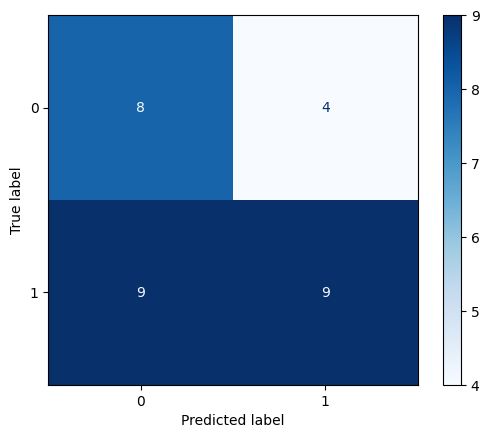

In [422]:
X_Main_test = pd.read_csv('./random_forest_test.csv')
y_Main_test = X_Main_test['Target']
X_Main_test = X_Main_test.drop(columns=drops)
X_Main_test = sc.transform(X_Main_test)
y_Main_pred = model.predict(X_Main_test)
print(f1_score(y_Main_test, y_Main_pred))
print(classification_report(y_Main_test, y_Main_pred))
ConfusionMatrixDisplay.from_estimator(model, X_Main_test, y_Main_test, cmap='Blues');


In [437]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(loss="log_loss" , random_state=41)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test , y_pred))
print(classification_report(y_test, y_pred))


0.5619596541786742
0.521259842519685
              precision    recall  f1-score   support

           0       0.52      0.44      0.47       312
           1       0.53      0.60      0.56       323

    accuracy                           0.52       635
   macro avg       0.52      0.52      0.52       635
weighted avg       0.52      0.52      0.52       635



using sgd method , hyperparameters set

0.7000000000000001
0.6
              precision    recall  f1-score   support

           0       0.50      0.33      0.40        12
           1       0.64      0.78      0.70        18

    accuracy                           0.60        30
   macro avg       0.57      0.56      0.55        30
weighted avg       0.58      0.60      0.58        30



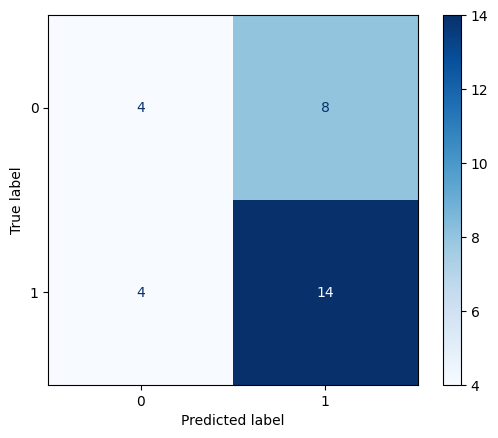

In [439]:
y_Main_pred = model.predict(X_Main_test)
print(f1_score(y_Main_test, y_Main_pred))
print(accuracy_score(y_Main_test , y_Main_pred))
print(classification_report(y_Main_test, y_Main_pred))
ConfusionMatrixDisplay.from_estimator(model, X_Main_test, y_Main_test, cmap='Blues');